In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table

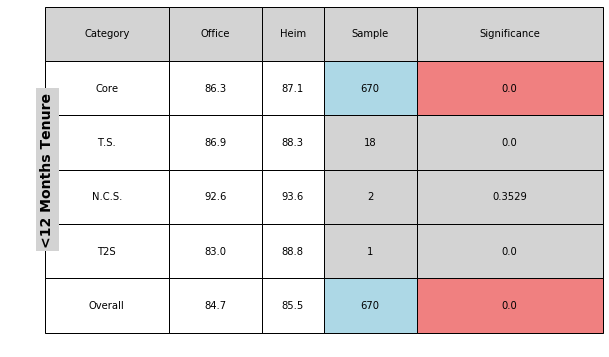

In [41]:
# Sample DataFrames (replace with your actual data)
data = {
    'Category': ['Core', 'T.S.', 'N.C.S.', 'T2S', 'Combined'],
    'Office': [86.3, 86.9, 92.6, 83.0, 84.7],
    'Heim': [87.1, 88.3, 93.6, 88.8, 85.5],
    'Sample': [670, 18, 2, 1, 670],
    'Significance': [0.0000, 0.0000, 0.3529, 0.0000, 0.0000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Ensure 'Combined' is always at the bottom and give it an alias display name
df['Category'] = df['Category'].replace('Combined', 'Overall')
df['SortOrder'] = df['Category'].apply(lambda x: 1 if x == 'Overall' else 0)
df = df.sort_values(by='SortOrder').drop(columns='SortOrder')

# Specify columns to include in the table
columns_to_include = ['Category', 'Office', 'Heim', 'Sample', 'Significance']
df = df[columns_to_include]

# Calculate the maximum width for each column
def get_max_widths(dataframe):
    max_widths = []
    for column in dataframe.columns:
        max_width = max(dataframe[column].astype(str).map(len).max(), len(column))
        max_widths.append(max_width)
    return max_widths

max_widths = get_max_widths(df)

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')

# Create a table
table = Table(ax, bbox=[0, 0, 1, 1])

# Add vertical header as an annotation
ax.annotate('<12 Months Tenure', xy=(0.005, 0.5), xycoords='axes fraction',
            rotation=90, va='center', ha='center', fontsize=14, fontweight='bold', bbox=dict(facecolor='lightgrey', edgecolor='none'))

# Add column headers with specified colors
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
col_labels = df.columns
header_colors = {
    'In-Office': 'lightblue',
    'At Home': 'lightyellow'
}

for j, label in enumerate(col_labels):
    facecolor = header_colors.get(label, 'lightgrey')
    table.add_cell(0, j, width=max_widths[j]*0.02, height=0.05, text=label, loc='center', facecolor=facecolor)

# Add data to the table with conditional formatting
for i in range(len(df)):
    for j in range(len(df.columns)):
        cell_text = df.iloc[i, j]
        cell_facecolor = 'white'
        
        # Highlight condition for Sample column: Sample >= 30 (blue) or < 30 (grey)
        if j == df.columns.get_loc('Sample'):
            if cell_text >= 30:
                cell_facecolor = 'lightblue'
            else:
                cell_facecolor = 'lightgrey'
        
        # Highlight condition for Significance column
        if j == df.columns.get_loc('Significance'):
            sample_value = df.iloc[i, df.columns.get_loc('Sample')]
            if sample_value >= 30:
                if cell_text < 0.05:
                    cell_facecolor = 'lightcoral'  # Light red
                else:
                    cell_facecolor = 'lightblue'
            else:
                cell_facecolor = 'lightgrey'
        
        table.add_cell(i+1, j, width=max_widths[j]*0.02, height=0.05, text=cell_text, loc='center', facecolor=cell_facecolor)

ax.add_table(table)

plt.show()